In [1]:
import sys
from pathlib import Path
sys.path.insert(1, Path.cwd().parent.as_posix())

from matplotlib import pyplot as plt
import numpy as np
from typing import TypedDict
from utils.oscilloscope import Oscilloscope, plot_data
from rberga06.phylab import Datum as d

# Prima parte

In [2]:
class Data(TypedDict):
    Epsilon: np.ndarray
    Voltage: np.ndarray
    dVoltage: np.ndarray
    Current: np.ndarray
    dCurrent: np.ndarray

data: list[Data] = [{
    "Epsilon": np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1., 1.1, 1.2, 1.3, 1.4, 1.7, 1.5, 1.6, 1.8, 1.9, 2.]),
    "Voltage": np.array([  # mV
        125.7, 210.3, 299.3, 391.5, 456.7, 492.0, 501.4, 519.8, 521.7, 532.3, 539.9, 547.8, 553.0, 557.4, 570.7, 559.7, 565.7, 573.6, 575.7, 579.7
    ])/1000,
    "dVoltage": np.array([.1]*20)/1000,
    "Current": np.array([  # µA
        .07, .10, .35, 4.2, 30.1, 82.9, 107.0, 175, 183.5, 241, 292, 350, 394, 439, 604, 463.2, 534, 643, 677, 744.7
    ])/1e6,
    "dCurrent": np.array([
        .01, .01, .01, .1, .1, .1, .1, 1, .2, 1, 1, 1, 1, 1, 1, .2, 1, 1, 1, .2
    ])/1e6,
}, {
    "Epsilon": np.array([float(x) / 10 for x in range(1, 14)]),
    "Voltage": np.array([
        156.1, 182.9, 330.1, 396.1, 508.8, 554.8, 619.8, 646.1, 732.1, 756.0, 858.4, 891.9, 944.6
    ])/1000,
    "dVoltage": np.array([.1]*13)/1000,
    "Current": np.array([
        .06, .06, .66, 3.97, 40.0, 67.9, 115, 135, 205, 225, 315, 344, 392
    ])/1e6,
    "dCurrent": np.array([
        .01, .01, .01, .01, .01, .1, 1, 1, 1, 1, 1, 1, 1
    ])/1e6,
}]

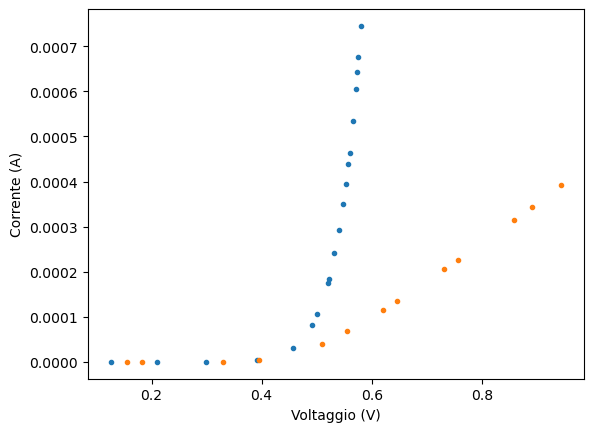

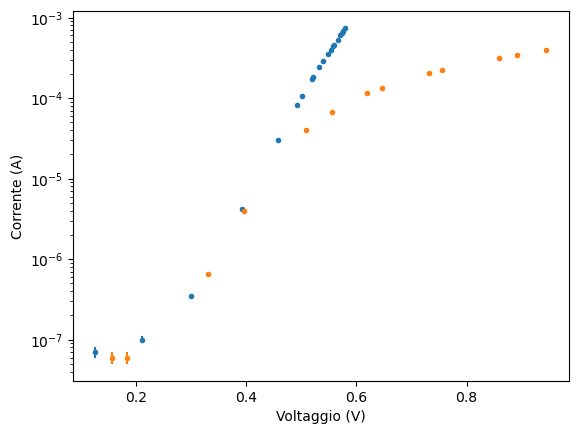

In [3]:
plt.xlabel("Voltaggio (V)")
plt.ylabel("Corrente (A)")
for d in data:
    plt.errorbar(x=d["Voltage"], y=d["Current"], xerr=d["dVoltage"], yerr=d["dCurrent"], fmt=".")
plt.show()
plt.xlabel("Voltaggio (V)")
plt.ylabel("Corrente (A)")
for d in data:
    plt.errorbar(x=d["Voltage"], y=d["Current"], xerr=d["dVoltage"], yerr=d["dCurrent"], fmt=".")
plt.yscale("log")
plt.show()

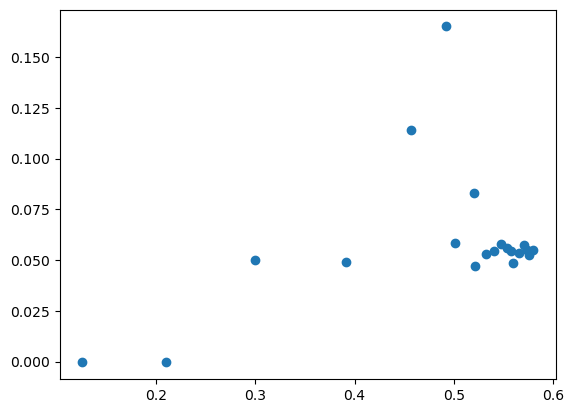

In [4]:
r = 50.
R = 1e3

for d in data[:1]:
    i1 = (d["Epsilon"] - d["Voltage"] - d["Current"] * R) / r
    # y = r / ((d["Epsilon"] - d["Voltage"])/d["Current"] - R)
    # plt.scatter(d["Voltage"], d["Current"])
    plt.scatter(d["Voltage"], d["Current"] /i1)
plt.show()

# Seconda parte

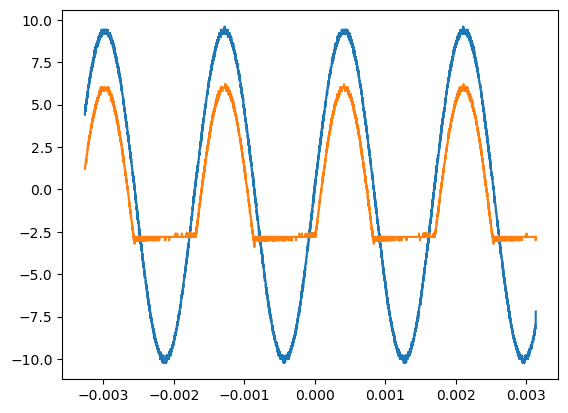

In [9]:
t, ch1, ch2 = Oscilloscope.Elettr.load_data(1, dir="data", plot_dir="elab")
plt.plot(t, ch1, color="C0")
plt.plot(t, ch2, color="C1")
# plt.plot(t, ch2 + ch1.max() - ch2.max(), color="C1")
plt.show()